In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

In [2]:
?NegativeBinomial

search: NegativeBinomial



```
NegativeBinomial(r,p)
```

A *Negative binomial distribution* describes the number of failures before the `r`th success in a sequence of independent Bernoulli trials. It is parameterized by `r`, the number of successes, and `p`, the probability of success in an individual trial.

$$
P(X = k) = {k + r - 1 \choose k} p^r (1 - p)^k, \quad \text{for } k = 0,1,2,\ldots.
$$

The distribution remains well-defined for any positive `r`, in which case

$$
P(X = k) = \frac{\Gamma(k+r)}{k! \Gamma(r)} p^r (1 - p)^k, \quad \text{for } k = 0,1,2,\ldots.
$$

```julia
NegativeBinomial()        # Negative binomial distribution with r = 1 and p = 0.5
NegativeBinomial(r, p)    # Negative binomial distribution with r successes and success rate p

params(d)       # Get the parameters, i.e. (r, p)
succprob(d)     # Get the success rate, i.e. p
failprob(d)     # Get the failure rate, i.e. 1 - p
```

External links:

  * [Negative binomial distribution on Wolfram](https://reference.wolfram.com/language/ref/NegativeBinomialDistribution.html)


* μ = mean(NegativeBinomial(r, p)) = (1-p)*r/p
* σ² = var(NegativeBinomial(r, p)) = (1-p)*r/p^2
* α = μ^2/σ² = (1-p)*r
* θ = σ²/μ = 1/p

In [3]:
mypdf(disy, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(x))

function plot_with_gammadist(dist; 
        μ = mean(dist), σ² = var(dist), σ = var(dist),
        a = max(minimum(dist)-1, μ - 4σ), b = min(maximum(dist), μ + 4σ),
        kwargs...
    )
    @show dist
    @show μ
    @show σ²
    α, θ = μ^2/σ², σ²/μ
    @show gamma = Gamma(α, θ)
    plot(x -> mypdf(dist, x), a, b; label="dist")
    plot!(gamma, a, b; label="gamma", ls=:dash)
    plot!(; kwargs...)
end

plot_with_gammadist (generic function with 1 method)

dist = NegativeBinomial{Float64}(r=1.0, p=0.1)
μ = 9.0
σ² = 89.99999999999999
gamma = Gamma(α, θ) = Gamma{Float64}(α=0.9000000000000001, θ=9.999999999999998)


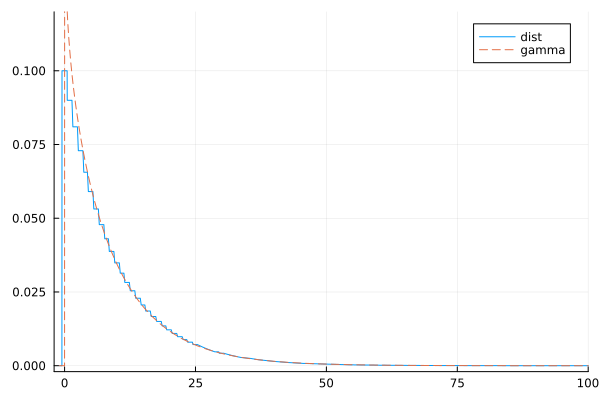

In [4]:
plot_with_gammadist(NegativeBinomial(1, 0.1); xlim=(-2, 100), ylim=(-0.002, 0.12))

dist = NegativeBinomial{Float64}(r=1.0, p=0.01)
μ = 99.0
σ² = 9900.0
gamma = Gamma(α, θ) = Gamma{Float64}(α=0.99, θ=100.0)


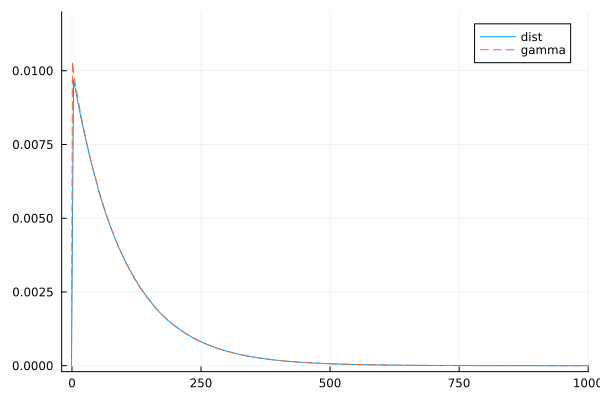

In [5]:
plot_with_gammadist(NegativeBinomial(1, 0.01); xlim=(-20, 1000), ylim=(-0.0002, 0.012))

dist = NegativeBinomial{Float64}(r=10.0, p=0.6)
μ = 6.666666666666667
σ² = 11.11111111111111
gamma = Gamma(α, θ) = Gamma{Float64}(α=4.000000000000001, θ=1.6666666666666665)


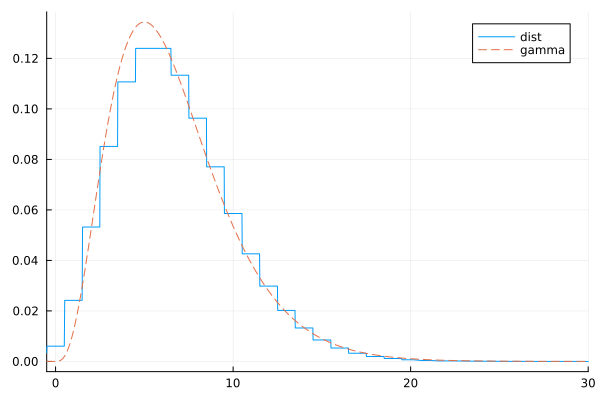

In [6]:
plot_with_gammadist(NegativeBinomial(10, 0.6); xlim=(-0.5, 30))

dist = NegativeBinomial{Float64}(r=10.0, p=0.2)
μ = 40.0
σ² = 199.99999999999997
gamma = Gamma(α, θ) = Gamma{Float64}(α=8.000000000000002, θ=4.999999999999999)


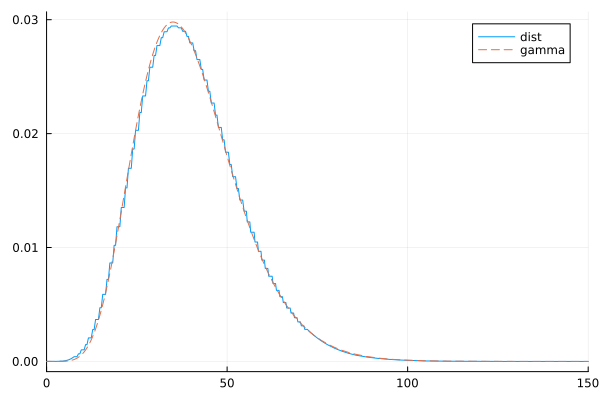

In [7]:
plot_with_gammadist(NegativeBinomial(10, 0.2); xlim=(0, 150))

In [8]:
function plot_with_scaledgamma(dist ; 
        μ = mean(dist), σ² = var(dist),
        kwargs...
    )
    @show dist
    @show μ
    @show σ²
    α, θ = μ^2/σ², σ²/μ
    @show θ
    @show gamma = Gamma(α, 1)
    b = 7√α
    a = -1/θ
    plot(x -> mypdf(dist, θ*x)*θ, a, b; label="dist/θ")
    plot!(gamma, a, b; label="gamma", ls=:dash)
    plot!(; kwargs...)
end

plot_with_scaledgamma (generic function with 1 method)

dist = NegativeBinomial{Float64}(r=1.0, p=0.1)
μ = 9.0
σ² = 89.99999999999999
θ = 9.999999999999998
gamma = Gamma(α, 1) = Gamma{Float64}(α=0.9000000000000001, θ=1.0)


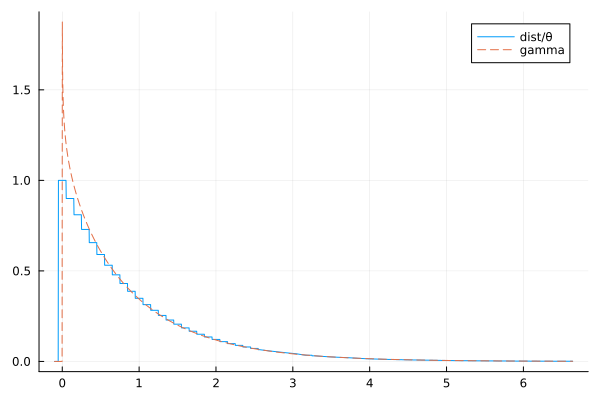

In [9]:
plot_with_scaledgamma(NegativeBinomial(1, 0.1))

dist = NegativeBinomial{Float64}(r=1.0, p=0.01)
μ = 99.0
σ² = 9900.0
θ = 100.0
gamma = Gamma(α, 1) = Gamma{Float64}(α=0.99, θ=1.0)


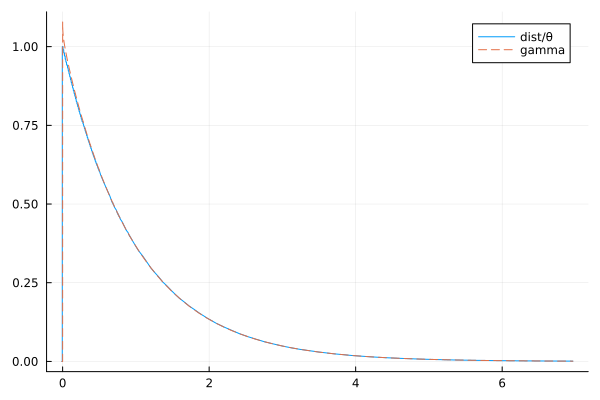

In [10]:
plot_with_scaledgamma(NegativeBinomial(1, 0.01))

dist = NegativeBinomial{Float64}(r=10.0, p=0.6)
μ = 6.666666666666667
σ² = 11.11111111111111
θ = 1.6666666666666665
gamma = Gamma(α, 1) = Gamma{Float64}(α=4.000000000000001, θ=1.0)


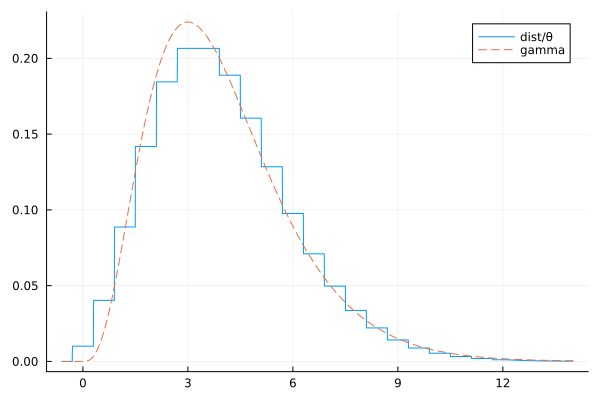

In [11]:
plot_with_scaledgamma(NegativeBinomial(10, 0.6))

dist = NegativeBinomial{Float64}(r=10.0, p=0.2)
μ = 40.0
σ² = 199.99999999999997
θ = 4.999999999999999
gamma = Gamma(α, 1) = Gamma{Float64}(α=8.000000000000002, θ=1.0)


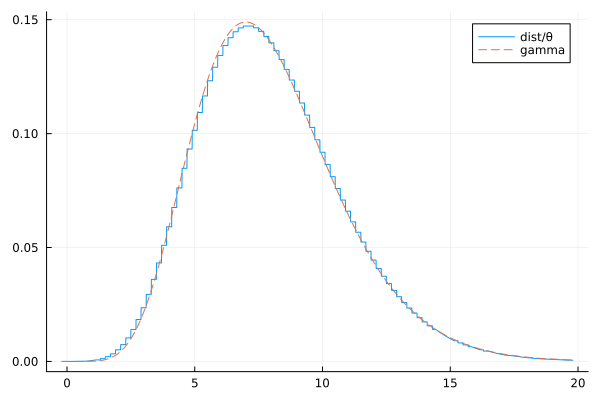

In [12]:
plot_with_scaledgamma(NegativeBinomial(10, 0.2))